In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
X = 2 * np.random.rand(100, 1)
y= 4 + 3*X + np.random.rand(100, 1)

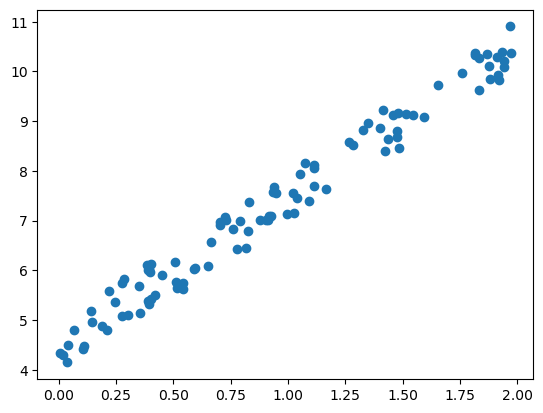

In [11]:
plt.scatter(X, y)

## Finding $\hat{\theta}$ using the normal equation

In [29]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(f"The best value for theta 0: {theta_best[0][0]}")
print(f"The best value fot theta 1: {theta_best[1][0]}")

The best value for theta 0: 4.436851675188595
The best value fot theta 1: 3.055409192190176


Predictions using $\hat{\theta}$

In [31]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.43685168],
       [10.54767006]])

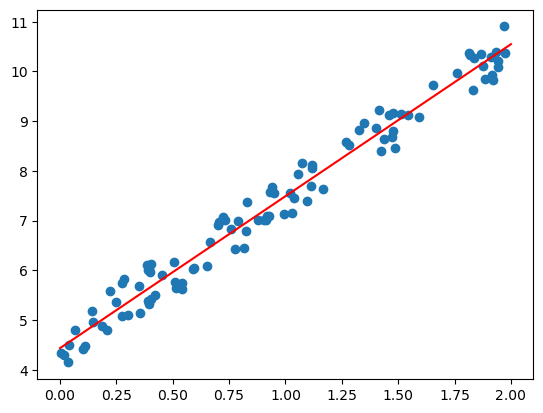

In [34]:
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.show()

## Linear regression using sklearn

In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f"Intercept of the regression: {lin_reg.intercept_[0]}")
print(f"Coeficient of the regression: {lin_reg.coef_[0][0]}")

Intercept of the regression: 4.436851675188589
Coeficient of the regression: 3.0554091921901745


In [38]:
lin_reg.predict(X_new)

array([[ 4.43685168],
       [10.54767006]])

## Gradient descent

In [58]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

In [59]:
for iteration in range(n_iterations):
    gradients = 2/m* X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [60]:
theta

array([[4.43685168],
       [3.05540919]])

## Stochastic Gradient descent

In [61]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t+t1)

In [63]:
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
    

In [64]:
theta

array([[4.42771573],
       [3.05310238]])

In [68]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_[0], sgd_reg.coef_[0]


(4.4203649229226745, 3.0634777535875273)